N = 10100
ion has left the boundary!
n = 1
simulation time =  9.000900090009e-09
number of positiions =  2


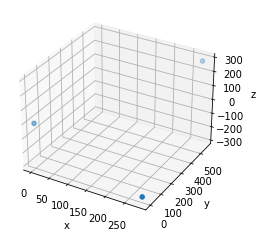

done!


In [11]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

class Ion:
    def __init__(self,position, charge, mass, v_z):
        self.position = position
        self.charge = charge
        self.m = mass
        self.v_z = v_z
        self.F = np.array([[0],[0],[0]])

class infiniteLengthQuadrupole:
    def __init__(self,R,r_0):
        # rod radius
        self.R = R
        # rod placement radius
        self.r_0 = r_0
        # rod positions
        self.pPole = np.array([[[ (R + r_0)/np.sqrt(2)],
                                [(R + r_0)/np.sqrt(2)],
                                [0]],
                                [[-(R + r_0)/np.sqrt(2)],
                                 [(R + r_0)/np.sqrt(2)],
                                 [0]],
                                [[-(R + r_0)/np.sqrt(2)],
                                 [-(R + r_0)/np.sqrt(2)],
                                 [0]],
                                [[(R + r_0)/np.sqrt(2)],
                                 [-(R + r_0)/np.sqrt(2)],
                                 [0]]])
        # rod pseudo charges
        self.rodsPseudoQ = np.zeros(4)
        # K factor for simplification ofcalculating the equations
        self.K = 1 / (4 * np.pi * sc.epsilon_0)
        
        self.forces= []
        
    def check(self):
        print('pole positions')
        print(self.pPole)
        print('pseudo charges')
        print(self.rodsPseudoQ)
        
    def phi_0(self,U, V, f, t):
        return U + V * np.sin(2 * np.pi * f * t)
    
    def coulombForceOnQ1(self,Q1,Q2,r1,r2):
        a = self.K * Q1 * Q2
        r12 = r1 - r2
        mag_r12 = np.linalg.norm(r12)
        # calculate force
        return a * r12 / (mag_r12**3)
        
    
    def calcNewIonPos(self,U,V,f,ion,t_s,t):
        
        # check if ion has left the r_0 boundary
        if np.linalg.norm(ion.position) >= self.r_0:
            return None
        
        signLUT = [1,-1,1,-1]
        index = 0;
        
        # reset force
        F_c = np.array([[0],[0],[0]])
        
        for Q in self.rodsPseudoQ:

            
            # calculate the pseudo charge points of the quadrupole
            Q = signLUT[index] * self.phi_0(U,V,f,t)/2 * self.K * self.R
            
            # match pseudo charge with ion in z direction
            self.pPole[index][2] = ion.position[2]
            
            #print('ion position', ion.position)
            #print(self.pPole[index])
            
            # calculate force on ion
            F_q = self.coulombForceOnQ1(ion.charge,
                                        Q,
                                        self.pPole[index],
                                        ion.position)
            #print(F_q)
            
            F_c = F_c + F_q
            self.forces.append(F_c)
            
            # update index
            index = index + 1
            
        ion.F = F_c
        # http://lampx.tugraz.at/~hadley/physikm/problems/rvaF/index.en.php
        newPosition = 0.5 * t_s**2 * 1 / ion.m * ion.F + ion.position
        
        # velocity component in z
        newPosition[2] =  newPosition[2] + ion.v_z * t_s

        #print(newPosition)
        
        return newPosition
    
N_periodes = 100
N_points_per_period = 101
f = 1.1e6    
t_step = 1 / f / N_points_per_period
t_sim = 0
N = N_periodes * N_points_per_period

# coffein atom 524.50002164 dalton (8.709527e-25 kg)


ion = Ion(np.array([[1e-10],[1e-10],[0]]), sc.e, 1.661e-27,1)

# quadrupole
quad = infiniteLengthQuadrupole(0.0101, 0.01)

#quad.check()

positions = []


positions.append(ion.position)
print('N =',N)
for n in range(0,N-1,1):
    
    newPos = quad.calcNewIonPos(2.4764,17.335,f,ion,t_step,t_sim)
    
    if(newPos is None):
        print('ion has left the boundary!')
        break
        
    
    ion.position = newPos
    
    if n % 100 is 0 and 0:
        positions.append(newPos)
    
    if 1:
        positions.append(newPos)
    
    t_sim += t_step

print('n =',n)
print('simulation time = ', t_sim)
print('number of positiions = ', len(positions))


if 0:
    print(positions[:10])

if 1:
    ax = plt.axes(projection='3d')
    #ax.scatter3D(positions[:][0], positions[:][1], positions[:][2], c=positions[:][2], cmap='Greens')
    ax.scatter3D(quad.forces[:][0], quad.forces[:][1], quad.forces[:][2], cmap='Greens')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

print('done!')
# dummy check
if 0:
    ion_1 = Ion(np.array([[0.0000005],[0],[0]]), 1000 * sc.e, 1,0)
    ion_2 = Ion(np.array([[-0.0000005],[0],[0]]), 1000 * sc.e, 1,0)
    print(quad.coulombForceOnQ1(ion_1.charge,ion_2.charge,ion_1.position,ion_2.position))
                 

[array([[1.e-100],
       [1.e-100],
       [0.e+000]]), array([[1.00000000e-100],
       [1.00000000e-100],
       [2.27272727e-007]])]


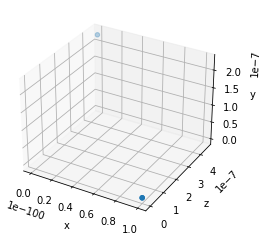

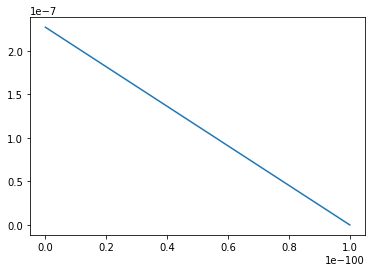

In [9]:
print(positions[:2])


# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
ax = plt.axes(projection='3d')
#ax.scatter3D(positions[:][0], positions[:][1], positions[:][2], c=positions[:][2], cmap='Greens')
ax.scatter3D(positions[:][0], positions[:][2], positions[:][1], cmap='Greens')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
plt.show()

plt.plot(positions[:][0],positions[:][1])


